# Feature Engineering for Iris Dataset

In [170]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
from sklearn.ensemble import RandomForestClassifier

In [171]:
# Load the Iris dataset
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

# Display the first few rows of the dataset
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Preprocessing

In [172]:
# Check for missing values
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [173]:
# Encoding the target variable
label_encoder = LabelEncoder()  # TODO: Use LabelEncoder from sklearn to encode the target variable into numerical format.
data['target'] = label_encoder.fit_transform(data['target'])

# Feature Engineering

In [174]:
# Example: Creating a new feature from existing ones
#area = width * length
data['sepal_area'] = data['sepal length (cm)'] * data['sepal width (cm)']
data['petal_area'] = data['petal length (cm)'] * data['petal width (cm)']
target = data.target
data = data.drop("target", axis=1)

In [175]:
# Standardizing numerical features
scaler = StandardScaler()  # TODO: Import the StandardScaler from sklearn.preprocessing.
# This scaler will be used to standardize (normalize) the numerical columns
# so that they have a mean of 0 and a standard deviation of 1.

# TODO: Select the numerical columns (those with int64 and float64 data types)
# from the dataset. These are the columns you need to standardize.
numerical_cols = data.select_dtypes(include=["int64", "float64"]).columns

# TODO: Fit the StandardScaler on the selected numerical columns (.fit_transform)
# and transform the data. Ensure that you replace the original numerical columns
# in the dataset with their standardized versions.
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [176]:
# Applying PCA
# TODO: Initialize PCA with 3 components (n_components=3), which means you
# want to reduce the dataset into 3 principal components.
pca = PCA(n_components=3)

# TODO: Fit PCA on the standardized numerical columns and transform the data.
# This will produce the new PCA features.
data_pca = pca.fit_transform(data[numerical_cols])
data['pca1'] = data_pca[:, 0]
data['pca2'] = data_pca[:, 1]
data['pca3'] = data_pca[:, 2]

# Adding PCA components to the dataframe
# TODO: Add the 3 PCA components (pca1, pca2, and pca3) to the original dataset
# as new columns. These will now be part of the dataset for further analysis.
# data_pca_scaled = scaler.fit_transform(data_pca)
# data['pca1'] = data_pca_scaled[:, 0]
# data['pca2'] = data_pca_scaled[:, 1]
# data['pca3'] = data_pca_scaled[:, 2]

In [177]:
# SelectKBest
# SelectKBest will be used to select the best features based on statistical tests.
# TODO: Separate the features (X) and the target (y) from the dataset.
# X should contain all the features except the target column, while y contains the target values.
y = target
X = data

# Using chi2 for feature selection
# TODO: Initialize SelectKBest with chi2 as the scoring function and choose the top 4 features (k=4).
select_k_best = SelectKBest(f_classif, k=4)

X_new = select_k_best.fit_transform(X, y)

In [178]:
# Using RFE with a RandomForestClassifier
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

# Displaying the selected features
selected_features = X.columns[fit.support_]
print(selected_features)
data["target"] = y

Index(['petal length (cm)', 'petal width (cm)', 'petal_area', 'pca1'], dtype='object')


#Forward Feature Selection

In [179]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load the Iris dataset
data = load_iris()
data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [180]:
#Let's create a dataframe
X = pd.DataFrame(data.data)
y = data.target


In [181]:
X.columns = data.feature_names
X.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [183]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [184]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
          k_features=4,
          forward=True,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5,
          n_jobs=-1
          ).fit(X_train, y_train)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    2.2s finished

[2024-10-10 19:56:45] Features: 1/4 -- score: 0.95[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.9s finished

[2024-10-10 19:56:47] Features: 2/4 -- score: 0.9333333333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    2.2s finished

[2024-10-10 19:56:49] Features: 3/4 -- score: 0.9333333333333332[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.

[2024-10-10 19:56:50] Features: 4/4 -- score: 0.925

In [185]:
sfs.k_feature_names_

('sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)')

In [186]:
sfs.k_feature_idx_

(0, 1, 2, 3)

In [187]:
sfs.k_score_

0.925

#Backward Feature Selection

In [188]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
          k_features=(1, 4),
          forward=False,
          floating=False,
          verbose=2,
          scoring='accuracy',
          cv=5,
          n_jobs=-1
          ).fit(X_train, y_train)

C:\Users\Jathavaan Shankarr\Code\NTNU\ai-programming\venv\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    1.3s finished

[2024-10-10 19:56:53] Features: 3/1 -- score: 0.9416666666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished

[2024-10-10 19:56:54] Features: 2/1 -- score: 0.9416666666666668[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    1.1s finished

[2024-10-10 19:56:56] Features: 1/1 -- score: 0.925

In [189]:
sbs = sfs
sbs.k_score_

0.9416666666666668

In [190]:
sbs.k_feature_names_

# check out this accuracy from above warning
# this 8 features may be change to another feature count

('sepal width (cm)', 'petal length (cm)')

#Exhaustive Feature Selection (EFS)

In [191]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [192]:
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
          min_features=3,
          max_features=4,
          scoring='accuracy',
          cv=None,
          n_jobs=-1
          ).fit(X_train, y_train)

Features: 5/5

In [193]:
efs.best_score_

1.0

In [194]:
efs.best_feature_names_

('sepal length (cm)', 'sepal width (cm)', 'petal length (cm)')

In [195]:
efs.best_idx_

(0, 1, 2)

In [196]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\Jathavaan Shankarr\Code\NTNU\ai-programming\venv\Lib\site-packages\mlxtend\feature_selection\exhaustive_feature_selector.py:583: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


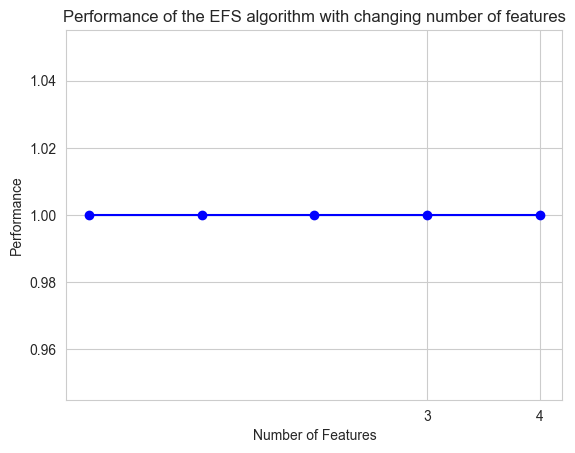

In [197]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')
plt.title('Performance of the EFS algorithm with changing number of features')
plt.show()

#Recursive Feature Elimination

In [198]:
lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, n_jobs=-1, max_iter=500)

In [199]:
# Import necessary libraries
from sklearn.feature_selection import RFE

# Create a Recursive Feature Elimination object using a logistic regression model
# n_features_to_select=7 specifies the number of features to select
rfe = RFE(lr, n_features_to_select=4)

# Fit the Recursive Feature Elimination object to the data
rfe.fit(X_train, y_train)

# Make predictions on the training data using the selected features
y_pred = rfe.predict(X_train)

In [200]:
y_pred

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

# LASSO Regularization (L1)

In [201]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score


In [202]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
for i, col in enumerate(X_train):
    print("Lasso model coefficients for {} is {}:".format(col, lasso.coef_[i]))

Lasso model coefficients for sepal length (cm) is 0.0:
Lasso model coefficients for sepal width (cm) is -0.0:
Lasso model coefficients for petal length (cm) is 0.41364440758519894:
Lasso model coefficients for petal width (cm) is 0.0:


# Ridge Model

In [203]:
ridge = Ridge(alpha=.3)  #coefficients are prevented to become too big by this alpha value
ridge.fit(X_train, y_train)
for i, col in enumerate(X_train.columns):
    print("Ridge model coefficients for {} is {}:".format(col, ridge.coef_[i]))

Ridge model coefficients for sepal length (cm) is -0.10828531516630349:
Ridge model coefficients for sepal width (cm) is -0.03543230519741787:
Ridge model coefficients for petal length (cm) is 0.24427951648704066:
Ridge model coefficients for petal width (cm) is 0.5772301178506374:


# Comparing the scores

In [204]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.9339644754462819
0.9053239233683795


In [205]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.9034185382976788
0.8566563393758283
